# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
# Your code here
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/adrientalbot/Documents/To-do-10%/lab-inbalance/data/PS_20174392719_1491204439457_log.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Description columns

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [4]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

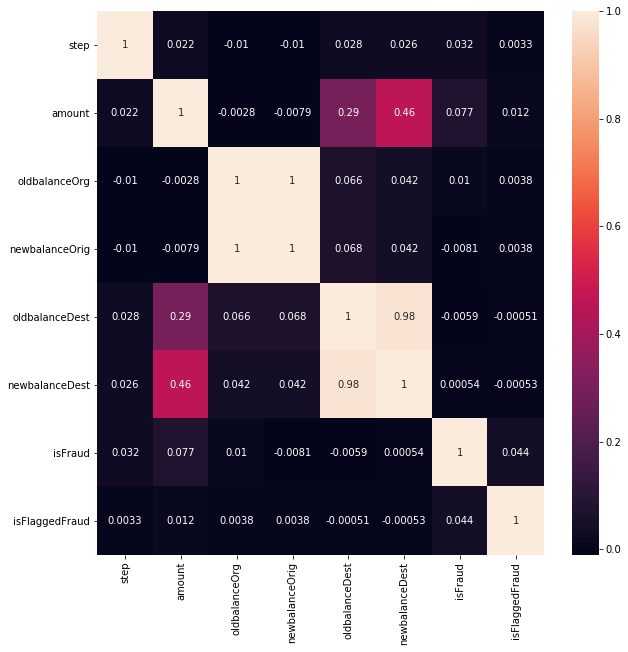

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

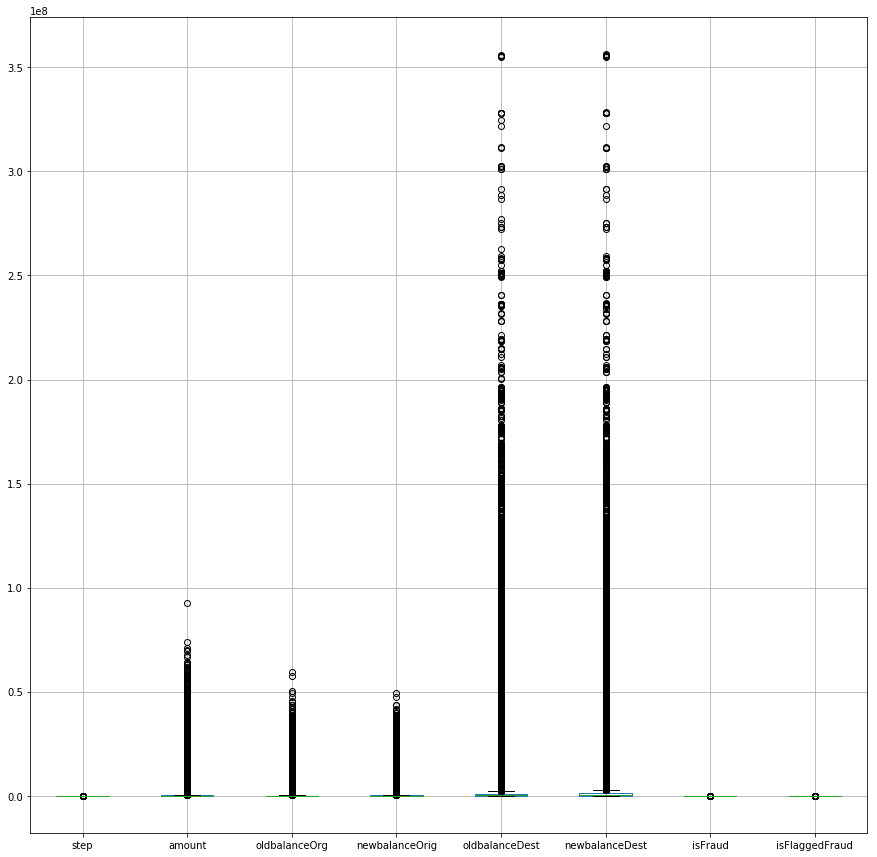

In [6]:
plt.figure(figsize=(15,15))
df.boxplot()

In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### What is the distribution of the outcome? 

In [8]:
# Your response here
# it is a Bernoulli distribution

In [9]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

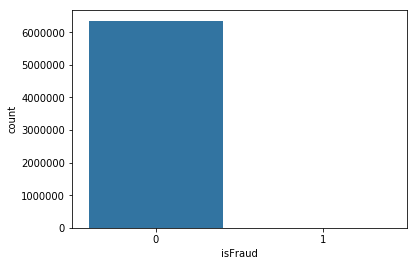

In [10]:
sns.countplot(df['isFraud'])

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [11]:
# Your code here
# No high correlated variables, so no cleaning necessary
# But we will drop the non-numeric columns (or use one hot encoding)
# We will drop the columns:
df = df.drop(['type', 'nameOrig', 'nameDest'], axis = 1)

### Run a logisitc regression classifier and evaluate its accuracy.

In [12]:
# Your code here
from sklearn.model_selection import train_test_split

y = df['isFraud']
x = df.drop(['isFraud','isFlaggedFraud'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [14]:
model.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [17]:
print(confusion_matrix(y_pred, y_test))

[[1269576     922]
 [   1305     721]]


In [18]:
print(accuracy_score(y_pred, y_test))

0.998249934775297


### Now pick a model of your choice and evaluate its accuracy.

In [19]:
# Your code here
# linear model: 
from sklearn.linear_model import LinearRegression
model_2 = LinearRegression()
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)

In [20]:
#print(accuracy_score(y_pred_2, y_test), normalize=False)
#print(confusion_matrix(y_pred_2, y_test), normalize=False)

### Which model worked better and how do you know?

In [21]:
# Your response here
# Since we are dealing with binary data, the logistic regression is better and we can't use LinearRegression model

In [22]:
# Try Random Forest:
from sklearn.ensemble import RandomForestRegressor

In [23]:
model_3 = RandomForestRegressor(max_depth=4, random_state=0)
model_3.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [24]:
y_pred_3 = model_3.predict(X_test)

In [29]:
#print(accuracy_score(y_pred_2, y_test), normalize=False)

In [26]:
#print(confusion_matrix(y_pred_2, y_test))

In [27]:
#Random Forrest does not work as well!